<h1><center> Plot simulation results: data07

<h4> Output file directory: `JuliaSEM/output/flux_sims/data__.out`

Plotting scripts: `JuliaSEM/scripts/plots.jl`, `JuliaSEM/scripts/earthquake-cycles.jl`

<h4> Simulation Description: </h4>
  

###### data03.out: 

    - Elastic halfspace 
    - Fault zone depth = 8km 
    - Fault zone half width = 0.5km.
    - Dc = 8 mm
    - maximum timestep = 180 days
    - UMich Flux: Compute time = 104 hrs, CPU time = 784 hrs 
    - cluster parameters: nodes=1:ppn=8, pmem=8gb
    
###### data05.out: 

    - Elastic halfspace 
    - Fault zone depth = 12km 
    - Fault zone half width = 0.5km.
    - Dc = 8 mm
    - maximum timestep = 180 days
    - UMich Flux: Compute time = 99 hrs 
    - cluster parameters: nodes=1:ppn=4, pmem=8gb

In [1]:
include("output.jl");

<h3> Plot results

In [23]:
# Cumulative-slip plot
include("scripts/cumulative-slip.jl")
include("scripts/plots.jl")

cumSlipPlot (generic function with 1 method)

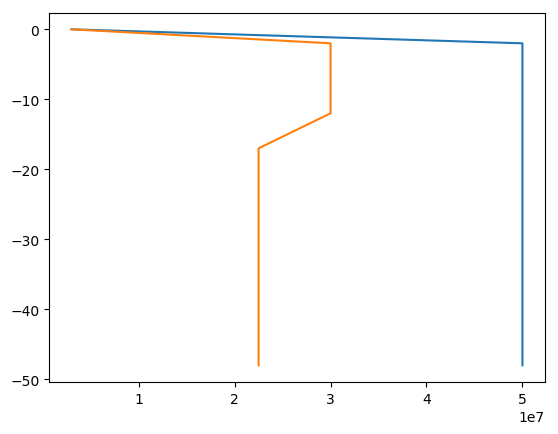

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x21ea661d0>

In [8]:
plot(S.Seff, S.FltX./1e3)
plot(S.tauo, S.FltX./1e3)

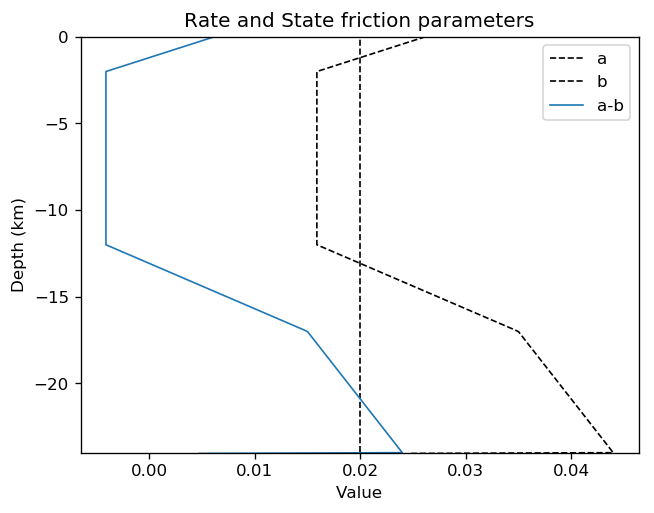

In [34]:
fricPlot(S.cca, S.ccb, S.FltX)

In [33]:
delf5yr[361:500,500]

140-element Array{Float64,1}:
 9.973358272606955    
 5.318647325225356e-6 
 5.318645705187919e-6 
 5.318645278862277e-6 
 5.318645655449927e-6 
 5.3186450443831745e-6
 5.318645669660782e-6 
 5.3186457193987735e-6
 5.318645563079372e-6 
 5.318645676766209e-6 
 5.318645548868517e-6 
 5.318645690977064e-6 
 5.3186457193987735e-6
 ⋮                    
 5.6819758764491795   
 5.749828641870277    
 5.873586554082095    
 5.991391011882737    
 6.051282161835992    
 6.109698222339148    
 6.216561520627199    
 6.318645506280305    
 6.370671647687182    
 6.421496307469514    
 6.514665455936704    
 6.6038900042135396   

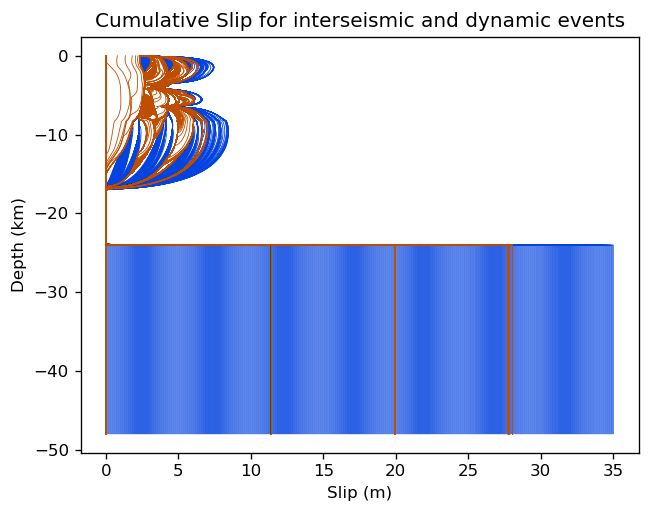

In [24]:
delfsec, delf5yr = cumSlip(O.Slip, O.SlipVel, O.time_)
cumSlipPlot(delfsec, delf5yr, S.FltX)

# MFD plot


In [36]:
include("scripts/earthquake-cycles.jl")

eq_catalog (generic function with 1 method)

In [37]:
delfafter, Stressdrop, tStart, = Coslip(S, O.Slip, O.SlipVel, O.Stress, O.time_)
eq_catalog(Mw, tStart, P.yr2sec)

UndefVarError: UndefVarError: Mw not defined

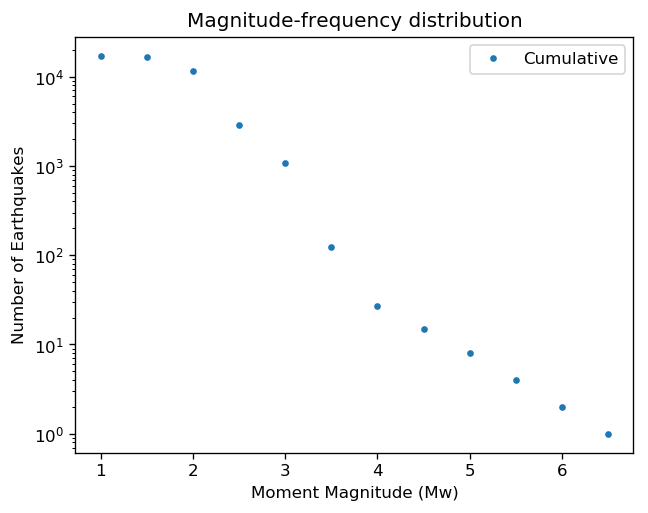

┌ Warning: Default for keyword argument "closed" has changed from :right to :left.
│ To avoid this warning, specify closed=:right or closed=:left as appropriate.
│   caller = ip:0x0
└ @ Core :-1


In [38]:
Mw, del_sigma = moment_magnitude(P, S, O.Slip, O.SlipVel, O.Stress, O.time_)

MwPlot(Mw)

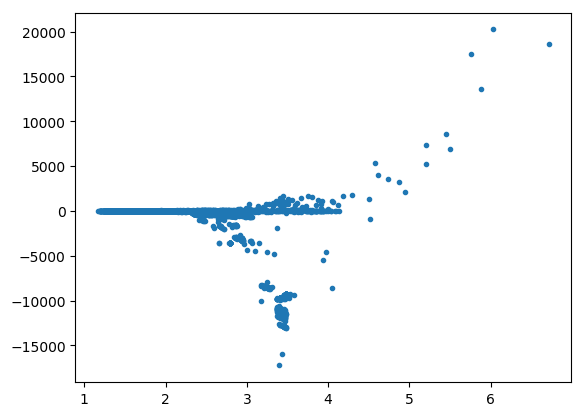

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x223af0978>

In [39]:
plot(Mw, del_sigma, ".")

<h3> Rough Work

delfafter, tStart, tEnd, vhypo, hypo = Coslip(S, O.Slip, O.SlipVel, O.time_);

In [ ]:
Vsurface = O.SlipVel[481,:]
PyPlot.plot(O.time_/P.yr2sec, Vsurface)

<h3> Earthquake Catalogue

In [ ]:
delfafter, Stressdrop, tStart, tEnd, vhypo, hypo = Coslip(S, O.Slip, O.SlipVel, O.Stress, O.time_)
#eq_catalog(Mw, tStart, P.yr2sec)

In [ ]:
findall(O.SlipVel[481,:] .< 0)

In [ ]:
O.time_[40000]/P.yr2sec

<h3> Plot Hypocenter

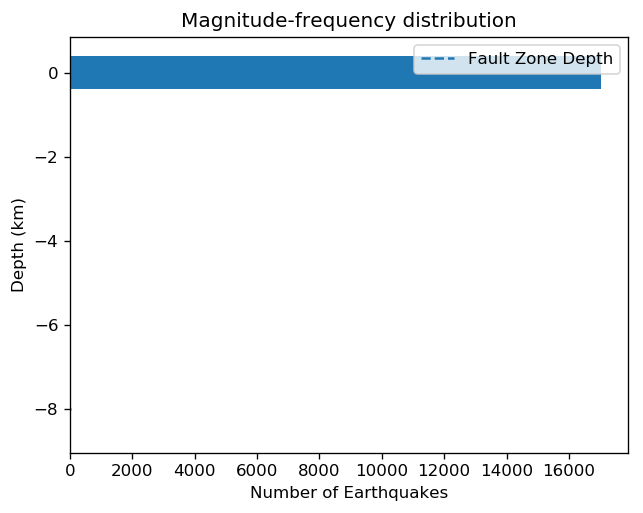

In [40]:
include("scripts/earthquake-cycles.jl")
plotHypo(S, O.Slip, O.SlipVel, O.Stress, O.time_)

In [ ]:
delfafter, tStart, hypo, vhypo = Coslip(S, O.Slip, O.SlipVel, O.time_);

In [ ]:
Vfmax = maximum(O.SlipVel, dims=1)[:]

In [ ]:
plot(log10.(Vfmax))

In [ ]:
ai, indx = findmax(O.SlipVel[:,2])

In [ ]:
S.FltX